In [ ]:
!pip3 install pyiqa

In [ ]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import cv2
import numpy as np
from PIL import Image
import pyiqa
from scipy import ndimage
import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# create metric with default setting
iqa_metric = pyiqa.create_metric('paq2piq', device=device)
# gradient propagation is disabled by default. set as_loss=True to enable it as a loss function.
iqa_loss = pyiqa.create_metric('paq2piq', device=device, as_loss=True)

In [ ]:
patch_path = '...'
images_pathes = '...'

In [ ]:
patch = cv2.imread(patch_path)
(y_patch, x_patch, _) = patch.shape
patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
df = pd.DataFrame({'image':[],
                   'gain':[]
                    })

 
Gain is  14.195632934570312


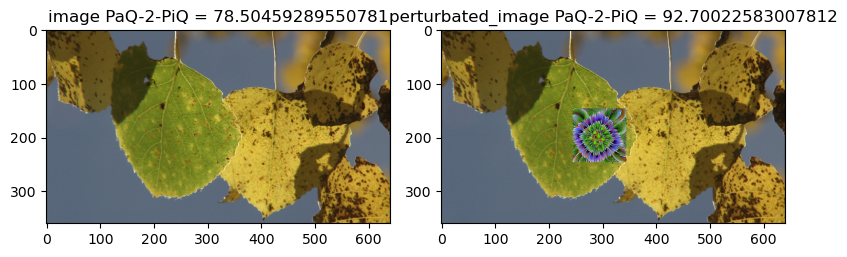

 
Gain is  14.149299621582031


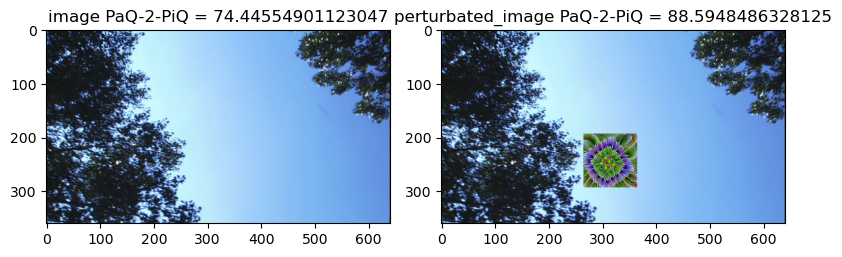

 
Gain is  15.412178039550781


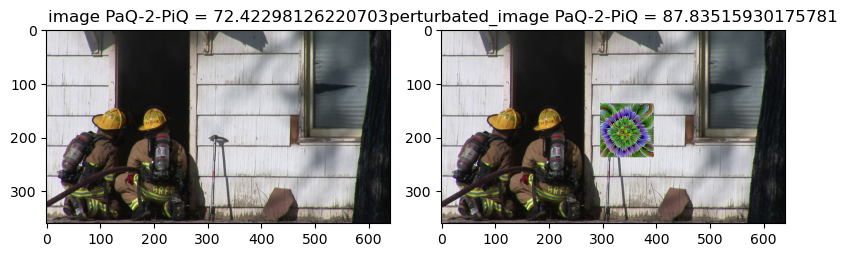

 
Gain is  14.964103698730469


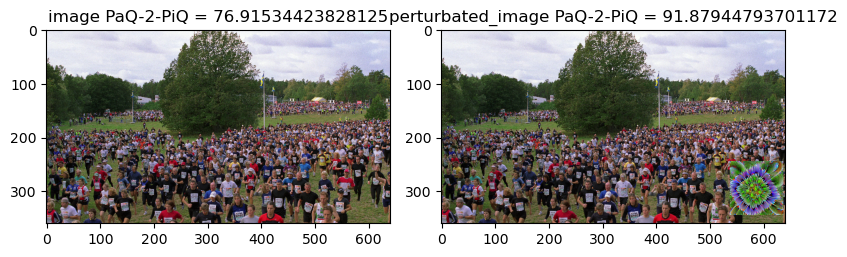

 
Gain is  29.61846160888672


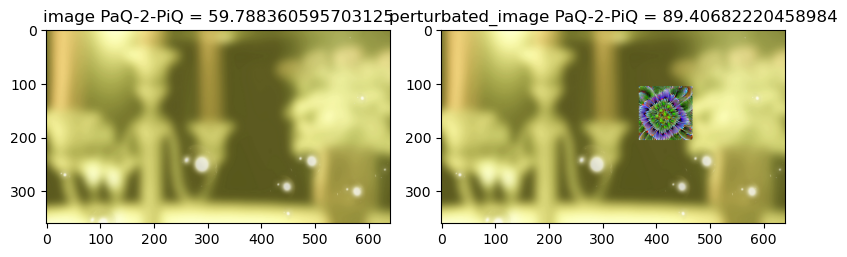

 
Gain is  13.227462768554688


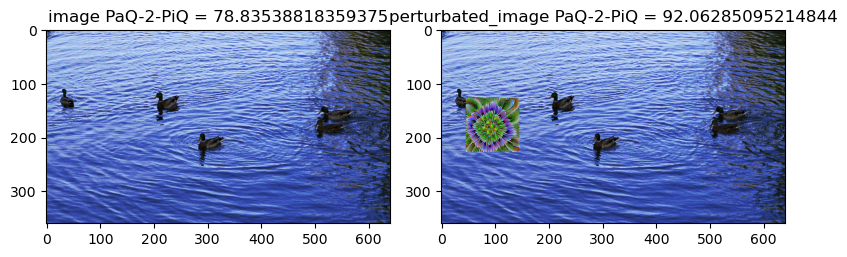

 
Gain is  14.673744201660156


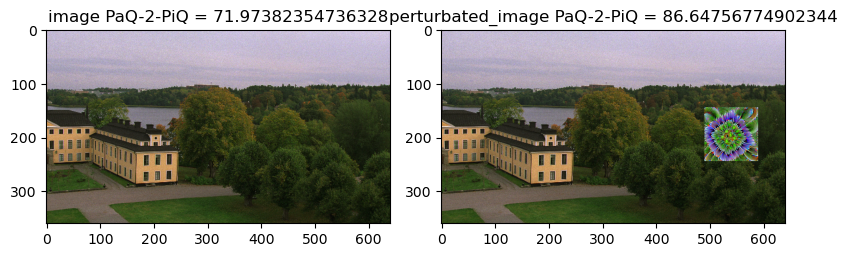

 
Gain is  12.601409912109375


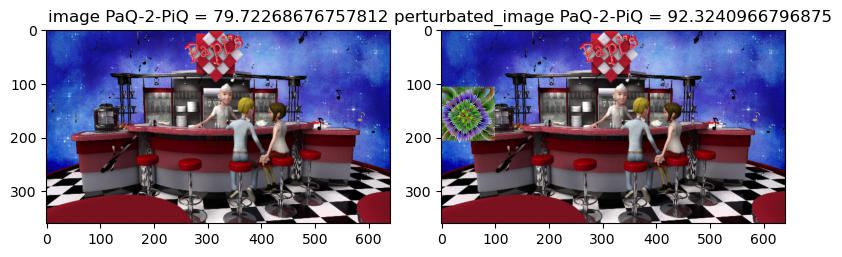

 
Gain is  15.327430725097656


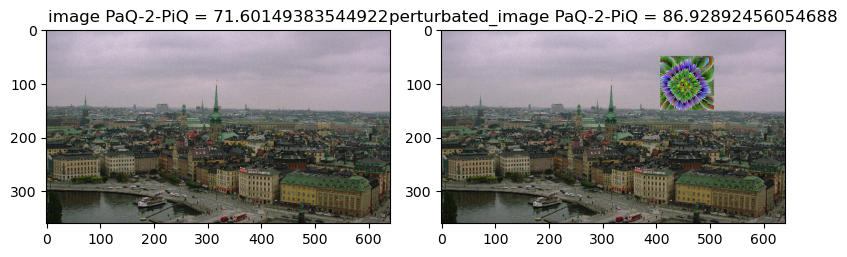

 
Gain is  15.042129516601562


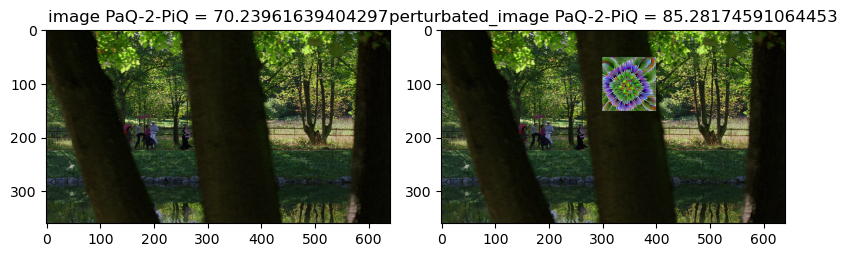

 
Gain is  26.606800079345703


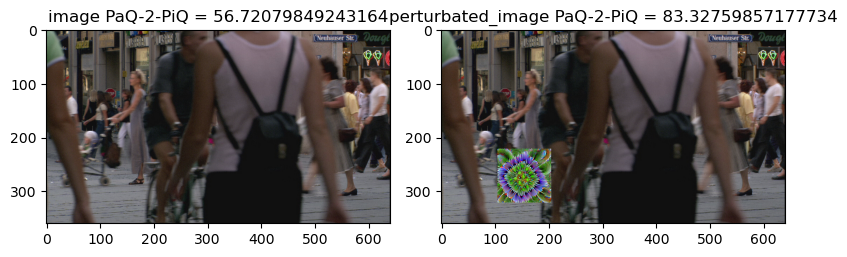

 
Gain is  18.419586181640625


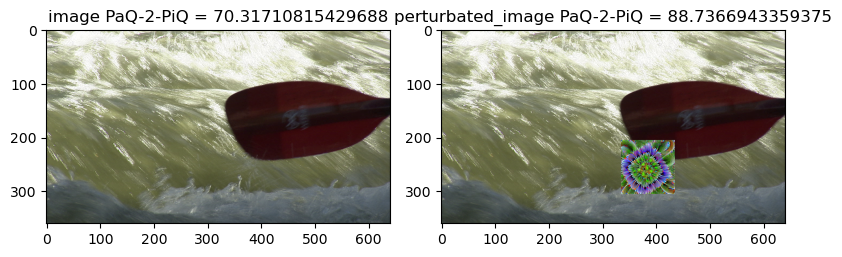

 
Gain is  29.867679595947266


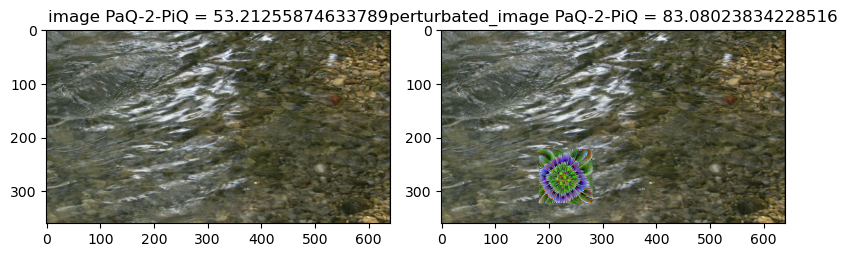

 
Gain is  13.787261962890625


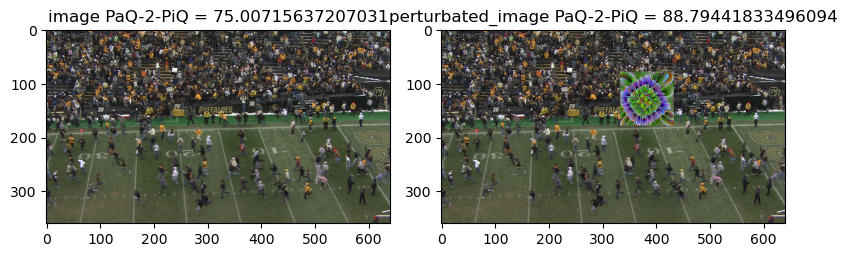

 
Gain is  25.628841400146484


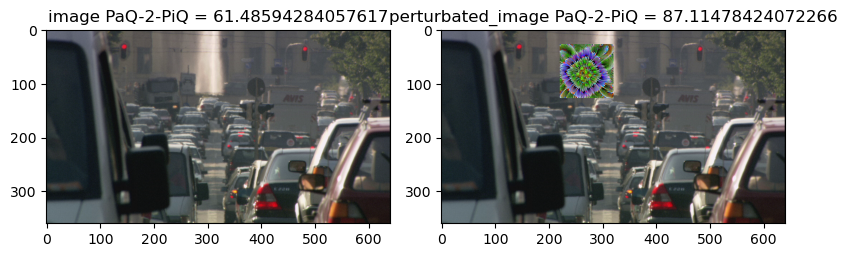

 
Gain is  22.310447692871094


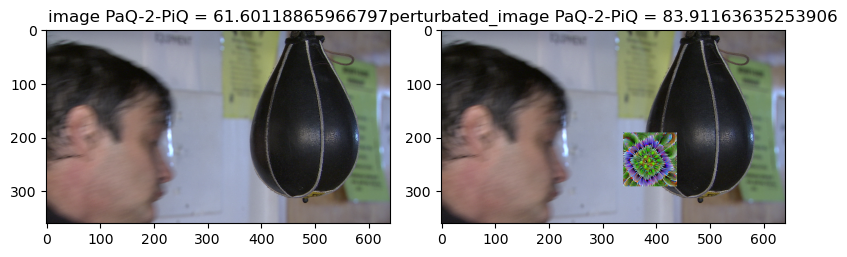

 
Gain is  15.80865478515625


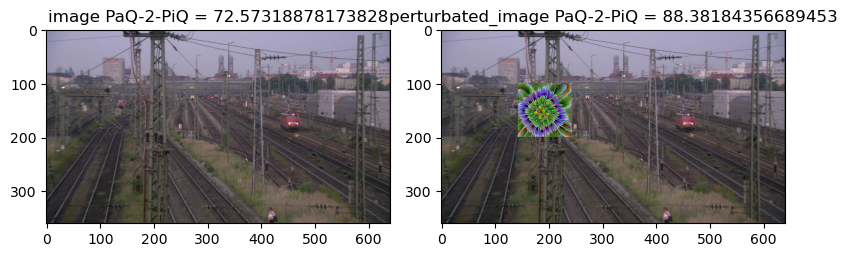

 
Gain is  22.073410034179688


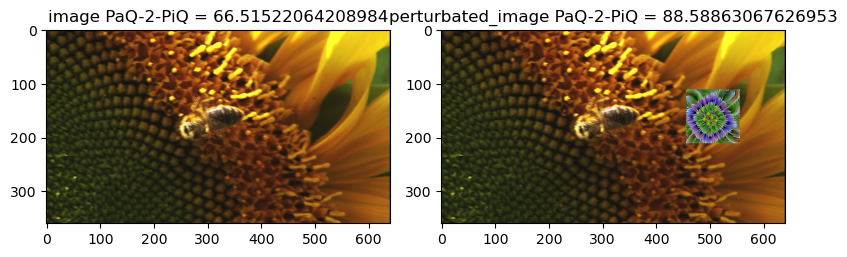

 
Gain is  16.948806762695312


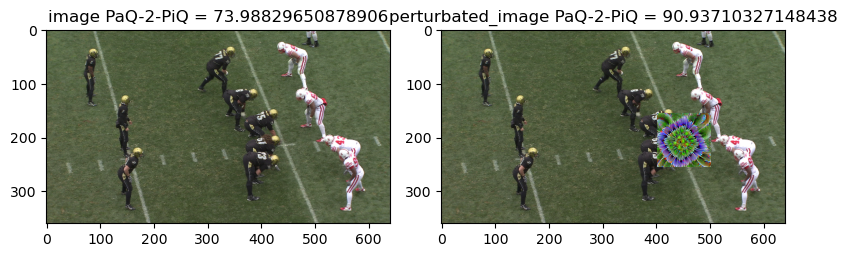

 
Gain is  16.29180145263672


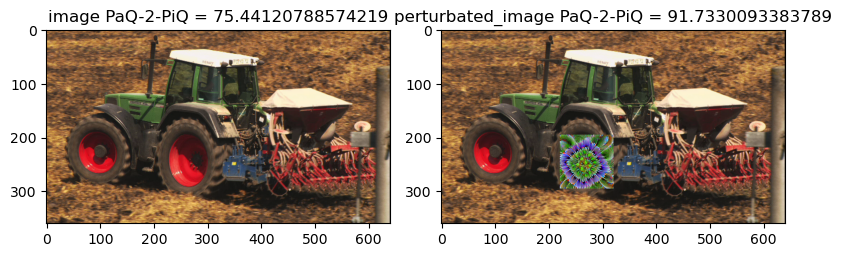

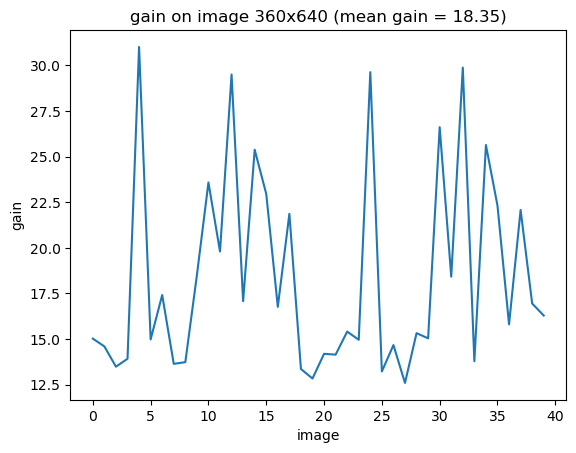

<Figure size 640x480 with 0 Axes>

In [ ]:
gain_list = []
for k in range(1, 21):

    image = cv2.imread(images_pathes)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    (y_image, x_image, _) = image.shape

    x_location, y_location = np.random.randint(low=0, high=y_image-y_patch), np.random.randint(low=0, high=x_image-x_patch)
    perturbated_image = image.copy()
    perturbated_image[x_location:x_location + x_patch, y_location:y_location + y_patch,:]= patch

    tensor_image = transforms.ToTensor()(image)
    tensor_image = tensor_image.unsqueeze_(0)
    score_before = iqa_metric(tensor_image).squeeze().item()

    tensor_image = transforms.ToTensor()(perturbated_image)
    tensor_image = tensor_image.unsqueeze_(0)
    score_after = iqa_metric(tensor_image).squeeze().item()

    gain = score_after - score_before
    gain_list.append(gain)
    df.loc[len(df.index)] = [k, gain]
    print(' ')
    print('Gain is ', gain)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('image PaQ-2-PiQ = '+ str(score_before))

    plt.subplot(1, 3, 2)
    plt.imshow(perturbated_image)
    plt.title('perturbated_image PaQ-2-PiQ = ' + str(score_after))

    plt.tight_layout()
    plt.show()

mean_gain = np.array(gain_list).mean()
mean_gain = np.round(mean_gain, 2)
df["gain"].plot(xlabel = 'image', ylabel = 'gain', title = f'gain on image 360x640 (mean gain = {mean_gain})')
fig1 = plt.gcf()
plt.show()
plt.draw()
